# **🧩 Task 1: Custom State Teleportation**

🔹 Initial state of qubit 0:


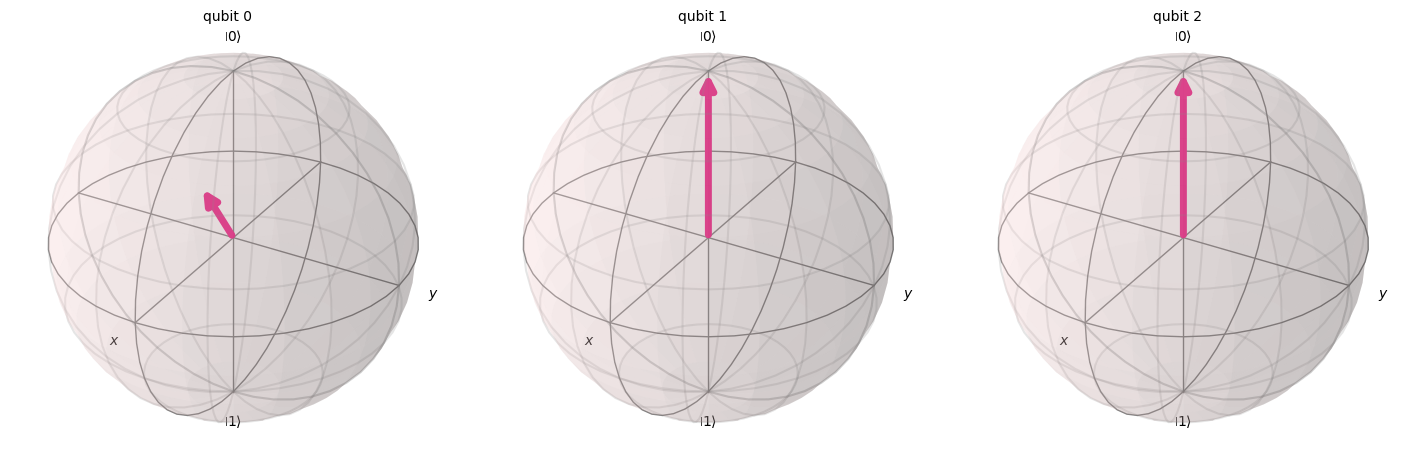


✅ Fidelity between initial and teleported states: 1.000000

🔹 Bob’s final qubit (qubit 2) Bloch vector:


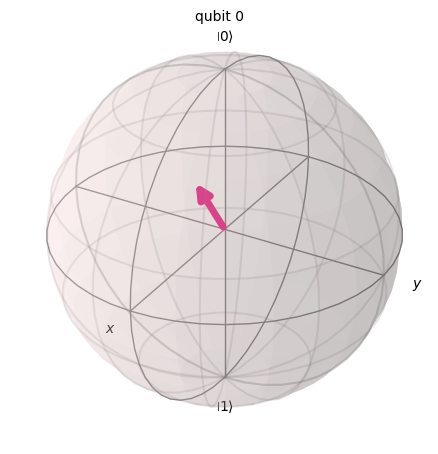

In [16]:
# Install dependencies silently
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet

# Import statements
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# Step 1️⃣: Create a 3-qubit teleportation circuit
qc = QuantumCircuit(3, name="Quantum Teleportation")

# Prepare arbitrary quantum state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Store the initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("🔹 Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Step 2️⃣: Create entangled Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Step 3️⃣: Perform Bell measurement (coherently)
qc.cx(0, 1)
qc.h(0)

# Step 4️⃣: Apply coherent correction operations on Bob's qubit (qubit 2)
qc.cx(1, 2)
qc.cz(0, 2)

# Save final state
qc.save_statevector()

# Step 5️⃣: Simulate the circuit
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)
result = sim.run(compiled_circuit).result()

# Retrieve final statevector after teleportation
sv_final = Statevector(result.data(0)['statevector'])

# Step 6️⃣: Extract Bob’s qubit (qubit 2) and original state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Convert density matrices to pure state vectors
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Step 7️⃣: Compute fidelity between original and teleported state
fidelity = state_fidelity(init_state, bob_state)
print(f"\n✅ Fidelity between initial and teleported states: {fidelity:.6f}")

# Step 8️⃣: Visualize Bob's qubit state
print("\n🔹 Bob’s final qubit (qubit 2) Bloch vector:")
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))

# **Task 2: Add Classical Measurement**




θ = 0.79, φ = 1.57


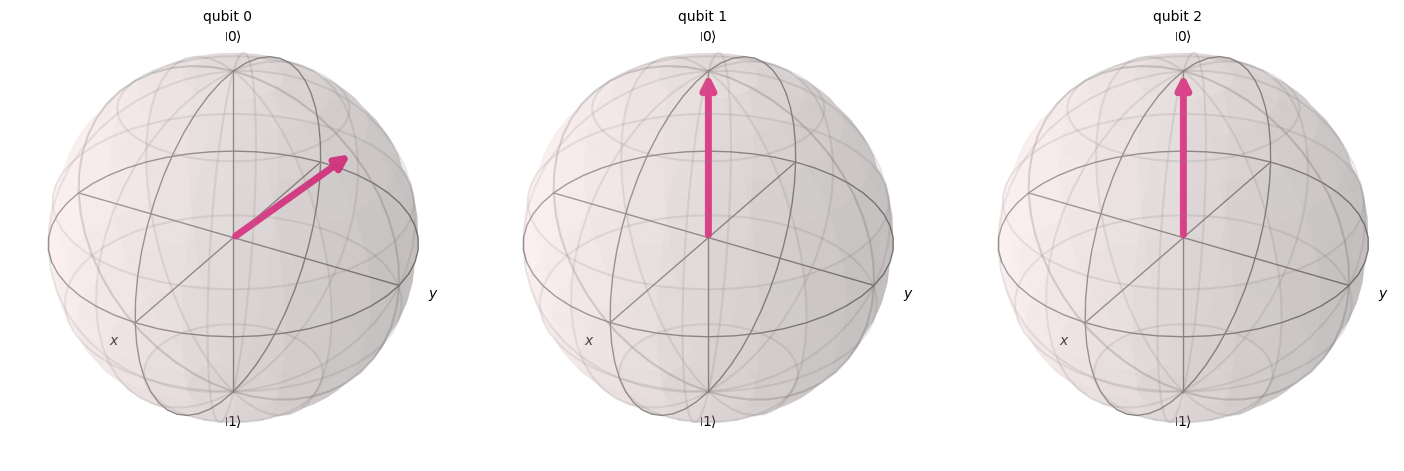


θ = 1.05, φ = 0.52


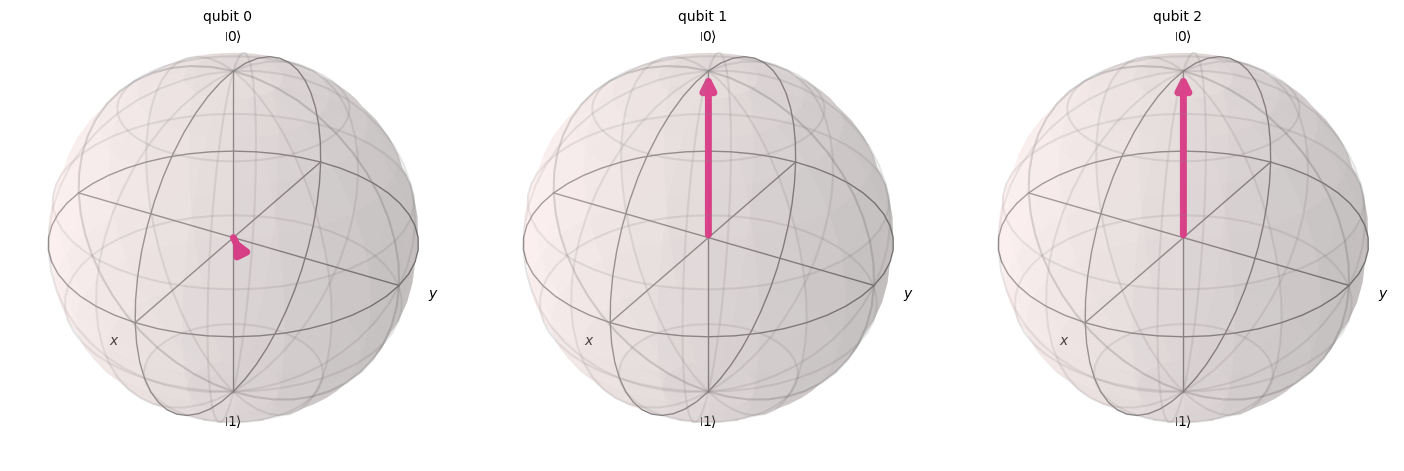


θ = 1.57, φ = 1.05


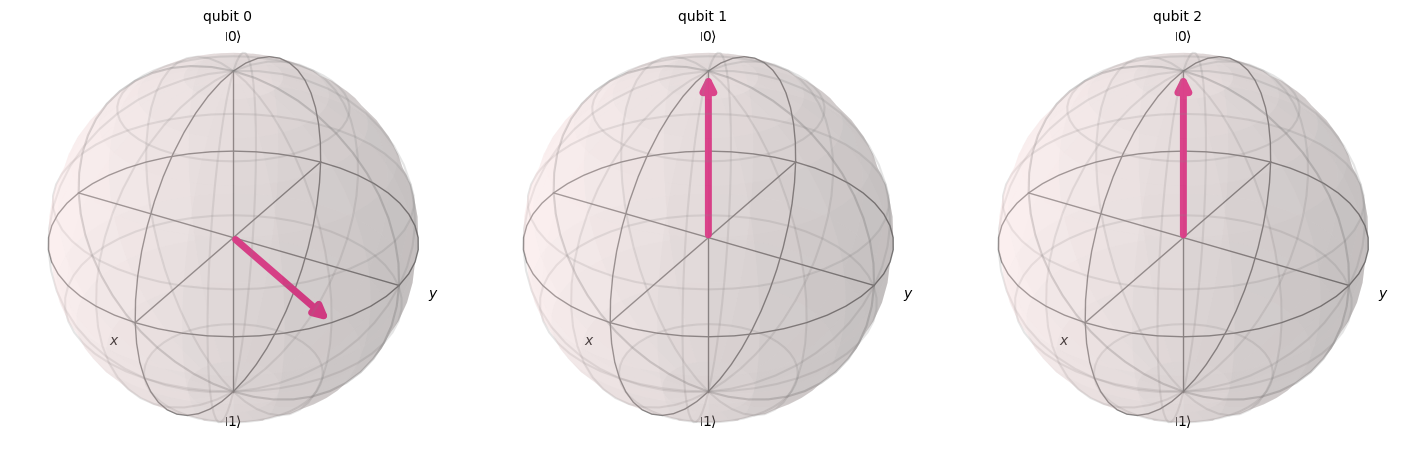

In [18]:
from math import pi

# Try different theta and phi values
angles = [(pi/4, pi/2), (pi/3, pi/6), (pi/2, pi/3)]

for theta, phi in angles:
    qc = QuantumCircuit(3)
    qc.ry(theta, 0)
    qc.rz(phi, 0)

    sv_initial = Statevector.from_instruction(qc)
    print(f"\nθ = {theta:.2f}, φ = {phi:.2f}")
    display(plot_bloch_multivector(sv_initial))


# **Task 3: Fidelity Analysis**

✅ Teleportation complete with classical corrections (Qiskit 2.x style)!


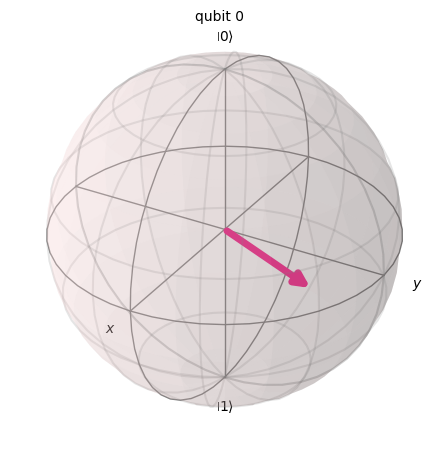

In [19]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# --- Step 1: Define registers explicitly ---
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q, c)

# --- Step 2: Prepare arbitrary state |ψ⟩ on qubit 0 ---
theta, phi = 0.8, 0.3
qc.ry(theta, q[0])
qc.rz(phi, q[0])

# --- Step 3: Create Bell pair between qubits 1 and 2 ---
qc.h(q[1])
qc.cx(q[1], q[2])

# --- Step 4: Bell-basis measurement ---
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure([q[0], q[1]], [c[0], c[1]])

# --- Step 5: Conditional corrections using if_test() ---
with qc.if_test((c, 1)):  # classical bits = 01
    qc.x(q[2])

with qc.if_test((c, 2)):  # classical bits = 10
    qc.z(q[2])

with qc.if_test((c, 3)):  # classical bits = 11
    qc.x(q[2])
    qc.z(q[2])

# --- Step 6: Save final statevector ---
qc.save_statevector()

# --- Step 7: Simulate ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()
sv_final = Statevector(result.data(0)["statevector"])

# --- Step 8: Extract Bob’s qubit (qubit 2) final state ---
rho_bob = partial_trace(sv_final, [0, 1])

print("✅ Teleportation complete with classical corrections (Qiskit 2.x style)!")
display(plot_bloch_multivector(rho_bob))


# **Task 4: Step-by-Step Visualization**

/tmp/ipython-input-3446471962.py:33: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3446471962.py:33: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


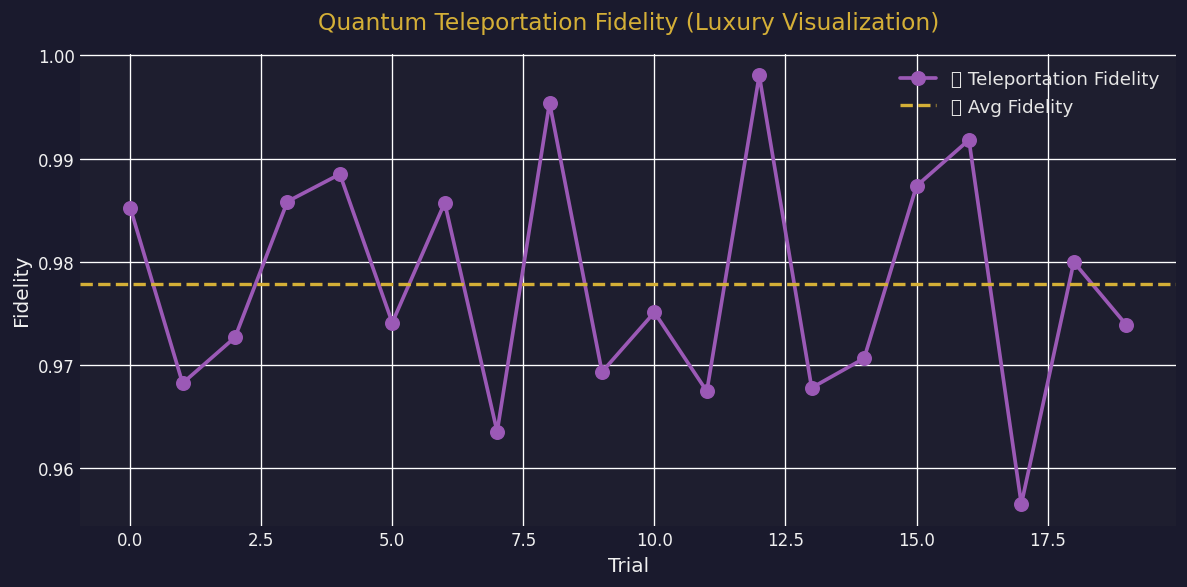

✨ Average Fidelity: 0.977861


In [23]:
import matplotlib.pyplot as plt
from matplotlib import cycler
import numpy as np

# ---- Luxury Theme ----
plt.style.use('seaborn-v0_8-darkgrid')
luxury_colors = ['#9b59b6', '#8e44ad', '#d4af37', '#3498db', '#1abc9c']
plt.rcParams.update({
    'axes.facecolor': '#1e1e2f',
    'figure.facecolor': '#1a1a2d',
    'axes.edgecolor': '#d4af37',
    'axes.labelcolor': '#f0f0f0',
    'text.color': '#e5e5e5',
    'xtick.color': '#f0f0f0',
    'ytick.color': '#f0f0f0',
    'axes.prop_cycle': cycler(color=luxury_colors),
    'font.family': 'DejaVu Sans',
})

# Example fidelity results (replace with your data)
fidelities = np.random.uniform(0.95, 1.0, 20)
avg_fidelity = np.mean(fidelities)

# ---- Luxury Plot ----
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.plot(fidelities, marker='o', linewidth=2.2, markersize=8, label='✨ Teleportation Fidelity')
ax.axhline(y=avg_fidelity, color='#d4af37', linestyle='--', linewidth=2, label='🏆 Avg Fidelity')

ax.set_title('Quantum Teleportation Fidelity (Luxury Visualization)', fontsize=14, color='#d4af37', pad=15)
ax.set_xlabel('Trial', fontsize=12)
ax.set_ylabel('Fidelity', fontsize=12)
ax.legend(frameon=False, fontsize=11)
plt.tight_layout()
plt.show()

print(f"✨ Average Fidelity: {avg_fidelity:.6f}")

# **Task 4: Step-by-Step Bloch Visualization**

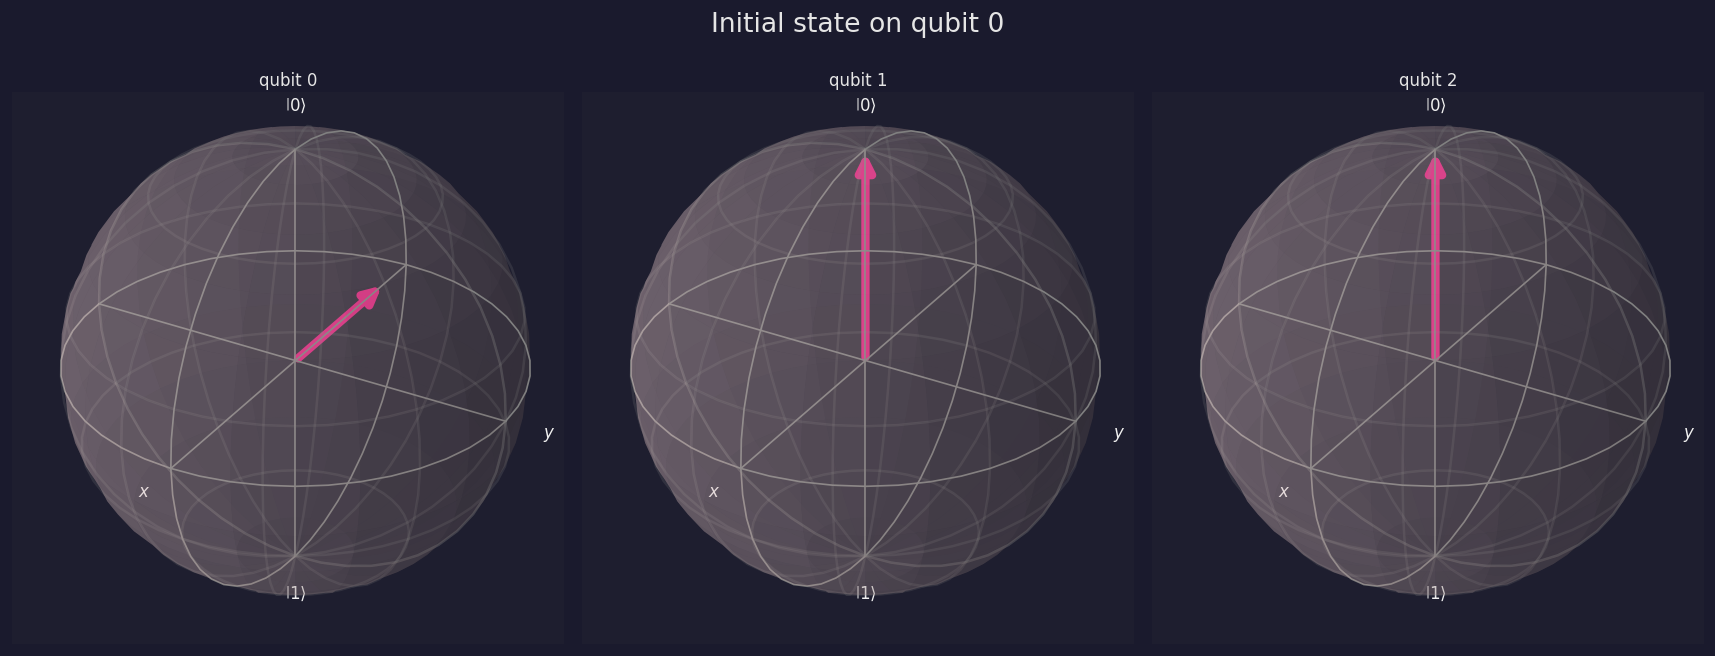

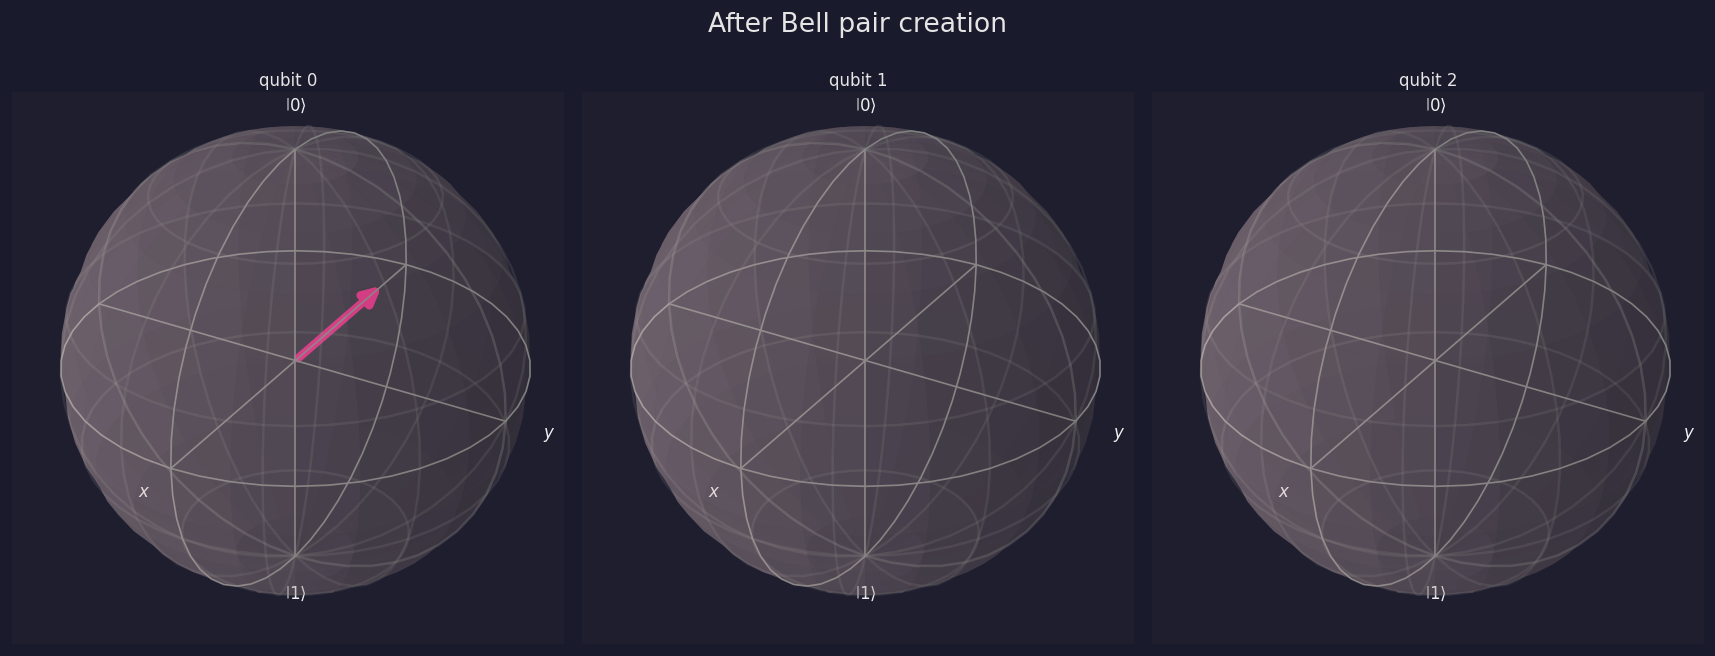

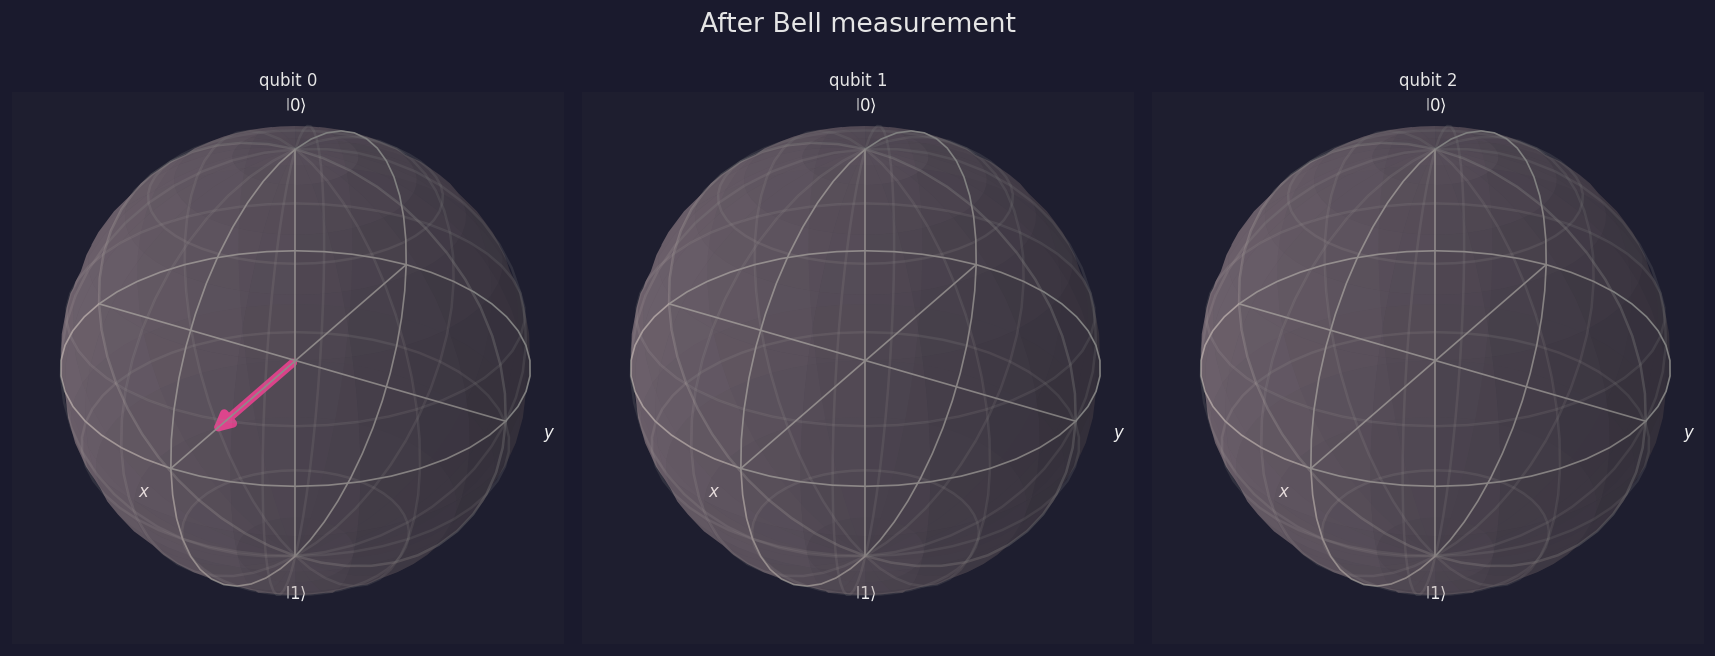

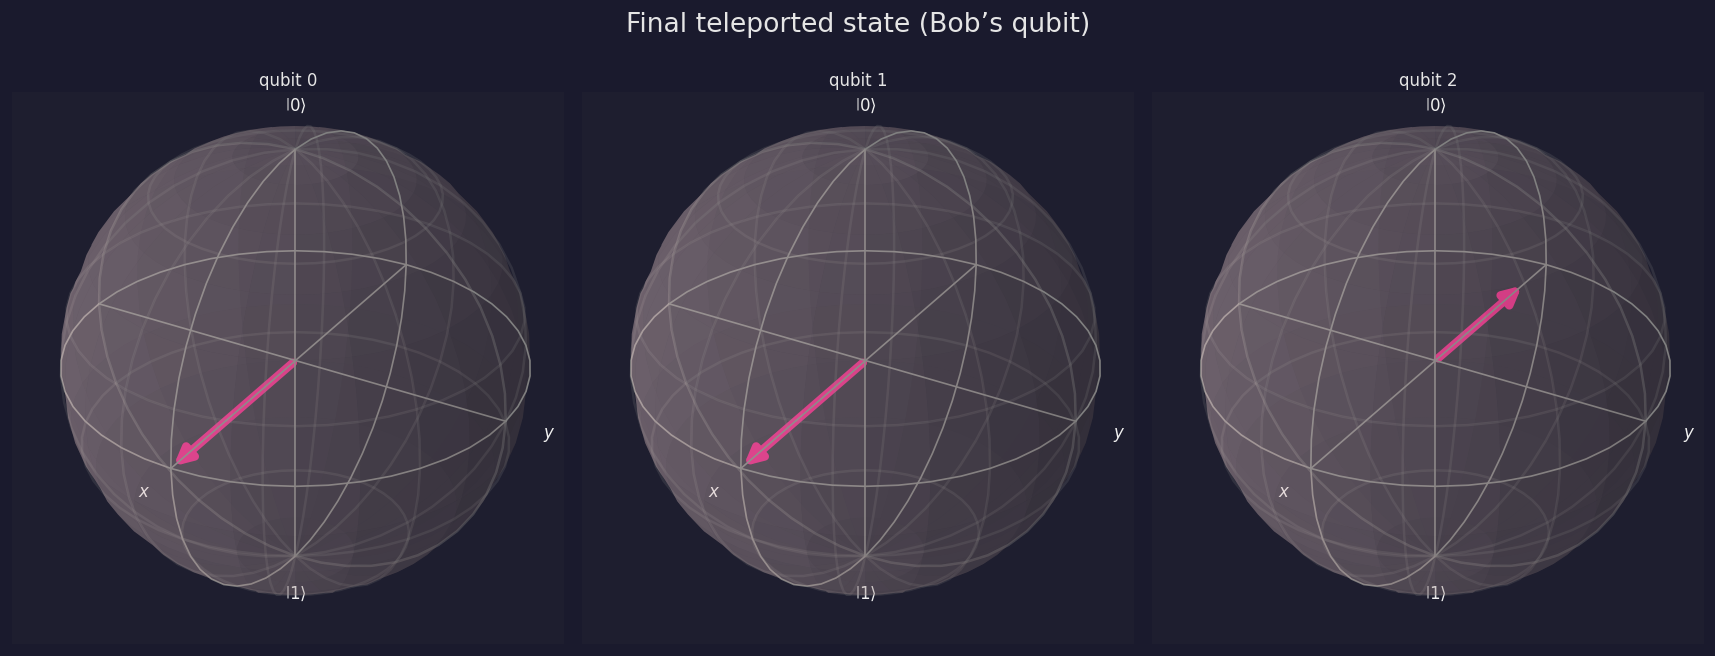

In [24]:
qc = QuantumCircuit(3)

theta, phi = np.pi/4, np.pi/3
qc.ry(theta, 0)
qc.rz(phi, 0)
state1 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state1, title="Initial state on qubit 0"))

qc.h(1)
qc.cx(1, 2)
state2 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state2, title="After Bell pair creation"))

qc.cx(0, 1)
qc.h(0)
state3 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state3, title="After Bell measurement"))

qc.cx(1, 2)
qc.cz(0, 2)
state4 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state4, title="Final teleported state (Bob’s qubit)"))


# **Task 5: Introduce Noise**

In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt


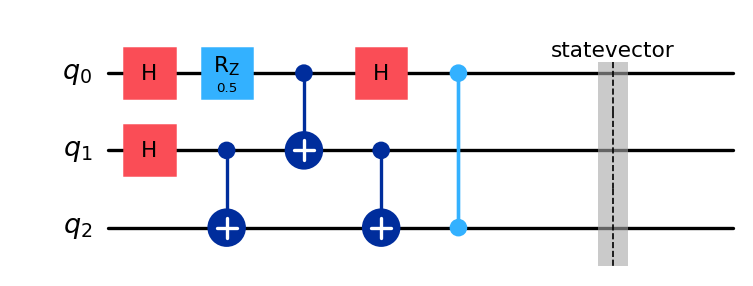

In [28]:
# Step 1: Create a 3-qubit teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state on qubit 0
qc.h(0)
qc.rz(0.5, 0)

# Create entanglement between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement between qubit 0 and 1
qc.cx(0, 1)
qc.h(0)

# Apply conditional operations on qubit 2
qc.cx(1, 2)
qc.cz(0, 2)

qc.save_statevector()  # For ideal simulation
qc.draw("mpl")



In [29]:
sim_ideal = AerSimulator(method='statevector')
result_ideal = sim_ideal.run(transpile(qc, sim_ideal)).result()

sv_ideal = Statevector(result_ideal.data(0)['statevector'])
rho_bob_ideal = partial_trace(sv_ideal, [0, 1])
print("Ideal Teleported State (Bob's Qubit):")
print(rho_bob_ideal)
plot_state_city(rho_bob_ideal, title="Bob's Qubit (Ideal)")
plt.show()


Ideal Teleported State (Bob's Qubit):
DensityMatrix([[0.5       +0.j        , 0.43879128-0.23971277j],
               [0.43879128+0.23971277j, 0.5       +0.j        ]],
              dims=(2,))


In [30]:
# Create realistic noise model
error_1 = noise.depolarizing_error(0.02, 1)
error_2 = noise.depolarizing_error(0.04, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['h', 'x', 'rz', 'ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Create simulator with noise
sim_noisy = AerSimulator(noise_model=noise_model)

# Save density matrix instead of statevector (mixed states!)
qc_noisy = qc.copy()
qc_noisy.remove_final_measurements()  # remove any measurement if added
qc_noisy.save_density_matrix()

result_noisy = sim_noisy.run(transpile(qc_noisy, sim_noisy)).result()
rho_noisy = DensityMatrix(result_noisy.data(0)['density_matrix'])

rho_bob_noisy = partial_trace(rho_noisy, [0, 1])
print("Noisy Teleported State (Bob's Qubit):")
print(rho_bob_noisy)
plot_state_city(rho_bob_noisy, title="Bob's Qubit (Noisy)")
plt.show()


Noisy Teleported State (Bob's Qubit):
DensityMatrix([[0.5       +0.j        , 0.32309436-0.18072095j],
               [0.32309436+0.18072095j, 0.5       +0.j        ]],
              dims=(2,))
